## Separate fMRI volumes according to movie fMRI topic

In [1]:
import os
import nibabel as nib
import numpy as np
from nilearn.image import index_img, new_img_like

In [2]:
os.getcwd()

'/project/3013104.01/scripts'

In [3]:
# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory by using the os.path.dirname() function
parent_directory = os.path.dirname(current_directory)

# Change the working directory to the main project directory
os.chdir(parent_directory)
os.getcwd()

'/project/3013104.01'

### Create three new matrices per scan so that each subject has separate matrices for each unique frame-topic combination

In [4]:
import pandas as pd
import os
import shutil

mri_dir = 'analysis/smoothed/pulled-data-MRI'
data_dir = 'analysis/roi_estimations'
EVfile = 'analysis/EVfiles.csv'
output_dir = 'analysis/aural_framing_by_movie_topic'
subjects = [subject for subject in os.listdir(mri_dir) if subject.startswith('subject-')]
mri_movietasks = ['mri_movietask_1', 'mri_movietask_2', 'mri_movietask_3']

# Check if the output_dir exists and delete it
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Create the output_dir
os.makedirs(output_dir)

# Read the EVfiles.csv as a pandas DataFrame
ev_files_df = pd.read_csv(EVfile)

for subject in subjects:
    for task in mri_movietasks:
        file_path = f'{data_dir}/{subject}_{task}_smoothed_filtered_func_data_clean_MNI.nii.csv'

        try:
            roi_estimations = pd.read_csv(file_path)

            # Insert new column 'volume' and fill it with (row number + 1)
            roi_estimations['volume'] = roi_estimations.index + 1

            # Iterate over unique combinations of 'framing' and 'topic_name'
            for _, row in ev_files_df.loc[(ev_files_df['subject'] == subject) & (ev_files_df['mri_movietask'] == task)].iterrows():
                framing = row['framing']
                topic_name = row['topic_name']
                volume_number = row['volume_onset_6'] # 6 seconds after the movie begins
                volume_duration = row['volume_duration'] # duration remains the same even though we remove the first 6 seconds after the movie begins because it's still movie-driven activity 

                result_df = roi_estimations[(roi_estimations['volume'] >= volume_number) &
                                            (roi_estimations['volume'] < volume_number + volume_duration)]

                # Create the output file name
                output_file = os.path.join(output_dir, f"{subject}_{task}_{volume_number}_{framing}_{topic_name}.csv")

                # Save the data frame to the output file
                result_df.to_csv(output_file, index=False)

            print(f"Data frames for {subject}_{task} are saved in the output directory.")
        except FileNotFoundError:
            print(f"File not found for {subject}_{task}. Skipping...")
            continue

print("All data frames are processed.")


File not found for subject-0126_mri_movietask_1. Skipping...
Data frames for subject-0126_mri_movietask_2 are saved in the output directory.
Data frames for subject-0126_mri_movietask_3 are saved in the output directory.
Data frames for subject-0201_mri_movietask_1 are saved in the output directory.
Data frames for subject-0201_mri_movietask_2 are saved in the output directory.
Data frames for subject-0201_mri_movietask_3 are saved in the output directory.
Data frames for subject-0139_mri_movietask_1 are saved in the output directory.
Data frames for subject-0139_mri_movietask_2 are saved in the output directory.
Data frames for subject-0139_mri_movietask_3 are saved in the output directory.
Data frames for subject-0186_mri_movietask_1 are saved in the output directory.
Data frames for subject-0186_mri_movietask_2 are saved in the output directory.
Data frames for subject-0186_mri_movietask_3 are saved in the output directory.
File not found for subject-0116_mri_movietask_1. Skipping..

Data frames for subject-0205_mri_movietask_1 are saved in the output directory.
Data frames for subject-0205_mri_movietask_2 are saved in the output directory.
Data frames for subject-0205_mri_movietask_3 are saved in the output directory.
Data frames for subject-0032_mri_movietask_1 are saved in the output directory.
Data frames for subject-0032_mri_movietask_2 are saved in the output directory.
Data frames for subject-0032_mri_movietask_3 are saved in the output directory.
Data frames for subject-0103_mri_movietask_1 are saved in the output directory.
Data frames for subject-0103_mri_movietask_2 are saved in the output directory.
Data frames for subject-0103_mri_movietask_3 are saved in the output directory.
File not found for subject-0031_mri_movietask_1. Skipping...
Data frames for subject-0031_mri_movietask_2 are saved in the output directory.
Data frames for subject-0031_mri_movietask_3 are saved in the output directory.
File not found for subject-0162_mri_movietask_1. Skipping..

Data frames for subject-0165_mri_movietask_1 are saved in the output directory.
Data frames for subject-0165_mri_movietask_2 are saved in the output directory.
Data frames for subject-0165_mri_movietask_3 are saved in the output directory.
Data frames for subject-0022_mri_movietask_1 are saved in the output directory.
Data frames for subject-0022_mri_movietask_2 are saved in the output directory.
Data frames for subject-0022_mri_movietask_3 are saved in the output directory.
Data frames for subject-0049_mri_movietask_1 are saved in the output directory.
Data frames for subject-0049_mri_movietask_2 are saved in the output directory.
Data frames for subject-0049_mri_movietask_3 are saved in the output directory.
Data frames for subject-0218_mri_movietask_1 are saved in the output directory.
Data frames for subject-0218_mri_movietask_2 are saved in the output directory.
Data frames for subject-0218_mri_movietask_3 are saved in the output directory.
Data frames for subject-0102_mri_movieta

Data frames for subject-0020_mri_movietask_2 are saved in the output directory.
Data frames for subject-0020_mri_movietask_3 are saved in the output directory.
Data frames for subject-0235_mri_movietask_1 are saved in the output directory.
Data frames for subject-0235_mri_movietask_2 are saved in the output directory.
Data frames for subject-0235_mri_movietask_3 are saved in the output directory.
Data frames for subject-0232_mri_movietask_1 are saved in the output directory.
Data frames for subject-0232_mri_movietask_2 are saved in the output directory.
Data frames for subject-0232_mri_movietask_3 are saved in the output directory.
Data frames for subject-0044_mri_movietask_1 are saved in the output directory.
Data frames for subject-0044_mri_movietask_2 are saved in the output directory.
Data frames for subject-0044_mri_movietask_3 are saved in the output directory.
Data frames for subject-0101_mri_movietask_1 are saved in the output directory.
Data frames for subject-0101_mri_movieta

Data frames for subject-0081_mri_movietask_2 are saved in the output directory.
Data frames for subject-0081_mri_movietask_3 are saved in the output directory.
File not found for subject-0085_mri_movietask_1. Skipping...
File not found for subject-0085_mri_movietask_2. Skipping...
Data frames for subject-0085_mri_movietask_3 are saved in the output directory.
Data frames for subject-0176_mri_movietask_1 are saved in the output directory.
Data frames for subject-0176_mri_movietask_2 are saved in the output directory.
Data frames for subject-0176_mri_movietask_3 are saved in the output directory.
Data frames for subject-0130_mri_movietask_1 are saved in the output directory.
Data frames for subject-0130_mri_movietask_2 are saved in the output directory.
Data frames for subject-0130_mri_movietask_3 are saved in the output directory.
Data frames for subject-0061_mri_movietask_1 are saved in the output directory.
Data frames for subject-0061_mri_movietask_2 are saved in the output directory

Data frames for subject-0030_mri_movietask_1 are saved in the output directory.
Data frames for subject-0030_mri_movietask_2 are saved in the output directory.
Data frames for subject-0030_mri_movietask_3 are saved in the output directory.
Data frames for subject-0144_mri_movietask_1 are saved in the output directory.
Data frames for subject-0144_mri_movietask_2 are saved in the output directory.
Data frames for subject-0144_mri_movietask_3 are saved in the output directory.
Data frames for subject-0064_mri_movietask_1 are saved in the output directory.
Data frames for subject-0064_mri_movietask_2 are saved in the output directory.
Data frames for subject-0064_mri_movietask_3 are saved in the output directory.
Data frames for subject-0092_mri_movietask_1 are saved in the output directory.
Data frames for subject-0092_mri_movietask_2 are saved in the output directory.
Data frames for subject-0092_mri_movietask_3 are saved in the output directory.
Data frames for subject-0028_mri_movieta

Data frames for subject-0160_mri_movietask_3 are saved in the output directory.
Data frames for subject-0066_mri_movietask_1 are saved in the output directory.
File not found for subject-0066_mri_movietask_2. Skipping...
Data frames for subject-0066_mri_movietask_3 are saved in the output directory.
Data frames for subject-0131_mri_movietask_1 are saved in the output directory.
Data frames for subject-0131_mri_movietask_2 are saved in the output directory.
Data frames for subject-0131_mri_movietask_3 are saved in the output directory.
Data frames for subject-0238_mri_movietask_1 are saved in the output directory.
Data frames for subject-0238_mri_movietask_2 are saved in the output directory.
Data frames for subject-0238_mri_movietask_3 are saved in the output directory.
File not found for subject-0157_mri_movietask_1. Skipping...
Data frames for subject-0157_mri_movietask_2 are saved in the output directory.
Data frames for subject-0157_mri_movietask_3 are saved in the output directory

### Create NaN matrices for subjects with missing data

In [20]:
import os
import re
import pandas as pd

output_dir = 'analysis/aural_framing_by_movie_topic'
frame_topics = ['neutral_climate_change', 'threat_climate_change', 'blame_climate_change', 'neutral_healthcare', 'threat_healthcare', 'blame_healthcare', 'neutral_immigration', 'threat_immigration', 'blame_immigration']

# Get a list of all .csv files in the output directory
csv_files = [filename for filename in os.listdir(output_dir) if filename.endswith('.csv')]

# Create a dictionary to store subjects with data for each frame topic
subjects_with_data = {topic: set() for topic in frame_topics}

# Populate the dictionary with subject identification numbers for each frame topic
for csv_file in csv_files:
    for topic in frame_topics:
        if topic in csv_file:
            subject_pattern = re.compile(r'subject-(\d+)_')
            subject_id = re.search(subject_pattern, csv_file).group(1)
            subjects_with_data[topic].add(subject_id)

# Get a set of all subject identification numbers
all_subjects = set([re.search(r'subject-(\d+)_', filename).group(1) for filename in os.listdir(output_dir)])

# Create a list to store table rows
table_data = []

# Iterate over each frame topic and find missing subjects
for topic in frame_topics:
    missing_subjects = all_subjects - subjects_with_data[topic]

    # Add rows to the table data
    for subject_id in sorted(missing_subjects, key=int):
        table_data.append({'frame_topic': topic, 'missing_subject': f"subject-{subject_id}"})

# Create a DataFrame from the table data
df = pd.DataFrame(table_data)

# Save the DataFrame as a CSV file
df.to_csv('analysis/missing_subjects_table.csv', index=False)

print("Table saved as 'missing_subjects_table.csv'")


Table saved as 'missing_subjects_table.csv'


In [32]:
import os
import pandas as pd

# Define the output directory
output_dir = 'analysis/missing_subjects_tables'

# Check if the output directory exists and delete it if it does
if os.path.exists(output_dir):
    for filename in os.listdir(output_dir):
        filepath = os.path.join(output_dir, filename)
        os.remove(filepath)
    os.rmdir(output_dir)

# Create the output directory
os.makedirs(output_dir, exist_ok=True)

# Load the missing subjects table
missing_subjects_table = pd.read_csv('analysis/missing_subjects_table.csv')

# Loop through each row in the missing subjects table
for index, row in missing_subjects_table.iterrows():
    missing_subject = row['missing_subject']
    frame_topic = row['frame_topic']
    
    # Calculate the number of rows based on frame_topic
    if 'healthcare' in frame_topic:
        num_rows = 70
    elif 'climate_change' in frame_topic:
        num_rows = 58
    elif 'immigration' in frame_topic:
        num_rows = 57
    
    # Generate the matrix filename
    matrix_filename = f"{missing_subject}_{frame_topic}.csv"
    
    # Create a matrix filled with 'NA'
    num_columns = 300
    new_matrix = [["NA" for _ in range(num_columns)] for _ in range(num_rows)]
    
    # Save the matrix as a CSV file
    matrix_filepath = os.path.join(output_dir, matrix_filename)
    pd.DataFrame(new_matrix).to_csv(matrix_filepath, index=False, header=[str(i) for i in range(num_columns)])
    print(f"Created matrix: {matrix_filename}")

print("Matrices creation and saving complete.")


Created matrix: subject-0008_neutral_climate_change.csv
Created matrix: subject-0022_neutral_climate_change.csv
Created matrix: subject-0027_neutral_climate_change.csv
Created matrix: subject-0040_neutral_climate_change.csv
Created matrix: subject-0058_neutral_climate_change.csv
Created matrix: subject-0060_neutral_climate_change.csv
Created matrix: subject-0062_neutral_climate_change.csv
Created matrix: subject-0088_neutral_climate_change.csv
Created matrix: subject-0089_neutral_climate_change.csv
Created matrix: subject-0093_neutral_climate_change.csv
Created matrix: subject-0112_neutral_climate_change.csv
Created matrix: subject-0124_neutral_climate_change.csv
Created matrix: subject-0147_neutral_climate_change.csv
Created matrix: subject-0157_neutral_climate_change.csv
Created matrix: subject-0161_neutral_climate_change.csv
Created matrix: subject-0162_neutral_climate_change.csv
Created matrix: subject-0185_neutral_climate_change.csv
Created matrix: subject-0199_neutral_climate_cha

Created matrix: subject-0181_blame_healthcare.csv
Created matrix: subject-0188_blame_healthcare.csv
Created matrix: subject-0201_blame_healthcare.csv
Created matrix: subject-0203_blame_healthcare.csv
Created matrix: subject-0209_blame_healthcare.csv
Created matrix: subject-0231_blame_healthcare.csv
Created matrix: subject-0237_blame_healthcare.csv
Created matrix: subject-0016_neutral_immigration.csv
Created matrix: subject-0023_neutral_immigration.csv
Created matrix: subject-0031_neutral_immigration.csv
Created matrix: subject-0040_neutral_immigration.csv
Created matrix: subject-0044_neutral_immigration.csv
Created matrix: subject-0047_neutral_immigration.csv
Created matrix: subject-0062_neutral_immigration.csv
Created matrix: subject-0066_neutral_immigration.csv
Created matrix: subject-0071_neutral_immigration.csv
Created matrix: subject-0084_neutral_immigration.csv
Created matrix: subject-0085_neutral_immigration.csv
Created matrix: subject-0114_neutral_immigration.csv
Created matrix

#### There are 2157 output files, but only needed (238x9=) 2142 files. Which subject has more files than necessary?

In [51]:
import os
import re
from collections import defaultdict

# Replace 'directory_path' with the path to your directory
directory_path = 'analysis/temp_07082023'

# Get a list of all files in the directory
file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

subject_count = {}  # Dictionary to store subject number counts

for filename in file_list:
    subject_number = filename.split('_')[0]  # Extract the subject number
    if subject_number.startswith('subject'):  # Check if the subject number starts with 'subject'
        if subject_number in subject_count:
            subject_count[subject_number] += 1
        else:
            subject_count[subject_number] = 1

# Filter and print the subject number counts
for subject_number, count in subject_count.items():
    if count < 9 or count > 9:  # Check if count is either less than 9 or greater than 9
        print(f"{subject_number}: {count} occurrences")

subject-0022: 12 occurrences
subject-0100: 12 occurrences
subject-0166: 12 occurrences
subject-0174: 12 occurrences
subject-0213: 12 occurrences


For some reason, subjects 0022, 0100, 0166, 0174, and 0213 had too many (n=12) matrices instead of the expected 9, so I deleted the extra ones. 

## Concatenate matrices according to the topic order: neutral, threat, then blame.

I.e., create a ROI time series for all subjects for all runs

In [6]:
import os
import pandas as pd

output_dir = 'analysis/aural_framing_by_movie_topic/concatenated'
working_dir = 'analysis/temp_07082023/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get a list of all CSV files in the working directory
csv_files = [filename for filename in os.listdir(working_dir) if filename.endswith('.csv')]

# Define the order of labels and their corresponding index
order = {
    'neutral_climate_change': 0,
    'threat_climate_change': 1,
    'blame_climate_change': 2,
    'neutral_healthcare': 3,
    'threat_healthcare': 4,
    'blame_healthcare': 5,
    'neutral_immigration': 6,
    'threat_immigration': 7,
    'blame_immigration': 8
}

# Custom sorting function considering order and 'NA' values
def custom_sort_key(filename):
    label = filename.rsplit('_', 1)[-1].split('.')[0]
    return order.get(label, len(order)), label

# Process each subject
for subject_id in set([filename.split('_')[0] for filename in csv_files]):
    subject_files = [filename for filename in csv_files if filename.startswith(subject_id + '_')]

    # Sort the subject files using the custom sorting function
    subject_files.sort(key=custom_sort_key)

    # Concatenate the CSV files for the current subject
    concatenated_data = pd.concat(
        [pd.read_csv(os.path.join(working_dir, filename)) for filename in subject_files],
        ignore_index=True  # Include files with 'NA' values
    )

    # Fill blanks with 'NA'
    concatenated_data = concatenated_data.fillna('NA')

    # Save the concatenated data to the output directory
    output_filename = os.path.join(output_dir, f'{subject_id}_concat.csv')
    concatenated_data.to_csv(output_filename, index=False)

print("Concatenation and saving complete.")


Concatenation and saving complete.


Each concatenated file should have 556 rows (including header).

### Delete the last column of each .csv 

The last column, 'volume', was there to keep track of the order of concatenation across volumes but it's no longer needed. 

In [7]:
import os
import pandas as pd

# Directory containing CSV files
directory_path = output_dir

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(directory_path, csv_file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Drop the 'volume' column if it exists
    if 'volume' in df.columns:
        df.drop(columns=['volume'], inplace=True)
        
        # Save the modified DataFrame back to the same CSV file
        df.to_csv(csv_path, index=False, na_rep='NA')  # Set na_rep to handle missing values
        
        print(f"'volume' column deleted from {csv_file}")
    else:
        print(f"'volume' column not found in {csv_file}")


'volume' column deleted from subject-0063_concat.csv
'volume' column deleted from subject-0203_concat.csv
'volume' column deleted from subject-0229_concat.csv
'volume' column deleted from subject-0196_concat.csv
'volume' column deleted from subject-0077_concat.csv
'volume' column deleted from subject-0024_concat.csv
'volume' column deleted from subject-0163_concat.csv
'volume' column deleted from subject-0085_concat.csv
'volume' column deleted from subject-0046_concat.csv
'volume' column deleted from subject-0080_concat.csv
'volume' column deleted from subject-0053_concat.csv
'volume' column deleted from subject-0123_concat.csv
'volume' column deleted from subject-0189_concat.csv
'volume' column deleted from subject-0032_concat.csv
'volume' column deleted from subject-0161_concat.csv
'volume' column deleted from subject-0018_concat.csv
'volume' column deleted from subject-0089_concat.csv
'volume' column deleted from subject-0121_concat.csv
'volume' column deleted from subject-0137_conc

'volume' column deleted from subject-0166_concat.csv
'volume' column deleted from subject-0040_concat.csv
'volume' column deleted from subject-0099_concat.csv
'volume' column deleted from subject-0182_concat.csv
'volume' column deleted from subject-0003_concat.csv
'volume' column deleted from subject-0179_concat.csv
'volume' column deleted from subject-0116_concat.csv
'volume' column deleted from subject-0064_concat.csv
'volume' column deleted from subject-0169_concat.csv
'volume' column deleted from subject-0154_concat.csv
'volume' column deleted from subject-0165_concat.csv
'volume' column deleted from subject-0223_concat.csv
'volume' column deleted from subject-0076_concat.csv
'volume' column deleted from subject-0045_concat.csv
'volume' column deleted from subject-0173_concat.csv
'volume' column deleted from subject-0048_concat.csv
'volume' column deleted from subject-0170_concat.csv
'volume' column deleted from subject-0070_concat.csv
'volume' column deleted from subject-0126_conc

### Convert concatenated data to z-scores

In [ ]:
import os
import pandas as pd

# Function to calculate z-scores for a given DataFrame
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()

# Directory containing concatenated CSV files
csv_directory = 'analysis/aural_framing_by_movie_topic/concatenated/'

# Directory to store the z-scored files
z_scored_directory = os.path.join(csv_directory, 'z_scored')
os.makedirs(z_scored_directory, exist_ok=True)

# List all files in the CSV directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Process each CSV file
for file in csv_files:
    file_path = os.path.join(csv_directory, file)

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Calculate z-scores for the DataFrame, preserving missing values
    z_scores_df = calculate_z_scores(df)

    # Create the z_scored directory if it doesn't exist
    os.makedirs(z_scored_directory, exist_ok=True)

    # Save the z-scored DataFrame into a new CSV file
    z_scored_file_path = os.path.join(z_scored_directory, file)
    
    # Specify na_rep parameter to handle missing values
    z_scores_df.to_csv(z_scored_file_path, index=False, na_rep='NA')

print("Z-scores calculated and saved to 'z_scored' directory.")

### Add 'roi_' prefix to column names

In [ ]:
import os
import pandas as pd

# Specify the directory containing the CSV files
directory = 'analysis/aural_framing_by_movie_topic/concatenated/z_scored'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Iterate through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(directory, csv_file)
    
    # Read the CSV file using pandas
    df = pd.read_csv(csv_path)
    
    # Add the 'roi_' prefix to each column header
    df.columns = ['roi_' + col for col in df.columns]
    
    # Write the modified DataFrame back to the CSV file
    df.to_csv(csv_path, index=False, na_rep='NA')

print("Prefix added to column headers in all CSV files.")


#### Plot

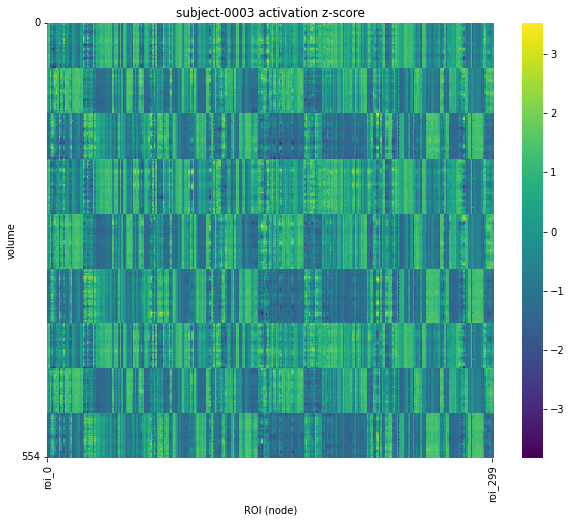

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

subject = 'subject-0003'

# Define the path to your CSV file
csv_path = f'analysis/aural_framing_by_movie_topic/concatenated/z_scored/{subject}_concat.csv'

# Load the CSV file into a DataFrame without row names and header
data = pd.read_csv(csv_path, header=0)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Plot the heatmap using the Viridis color map
sns.heatmap(data, cmap='viridis', cbar=True)

# Set x-axis and y-axis tick labels to only minimum and maximum values
x_ticks = [0, data.shape[1] - 1]
y_ticks = [0, data.shape[0] - 1]
plt.xticks(x_ticks, labels=data.columns[x_ticks], rotation='vertical')
plt.yticks(y_ticks, labels=data.index[y_ticks])

plt.title(f'{subject} activation z-score')
plt.xlabel('ROI (node)')
plt.ylabel('volume')

plt.show()

### Create a 3d array: subjects x volumes x ROIs

In [22]:
import os
import numpy as np
import pandas as pd

working_dir = 'analysis/aural_framing_by_movie_topic/concatenated/z_scored'
subject_files = [f for f in os.listdir(working_dir) if f.endswith(".csv")]
subject_files.sort() # ensures the subjects are sorted 

data_list = []

for filename in subject_files:
    file_path = os.path.join(working_dir, filename)
    
    # Load the CSV file using pandas
    data = pd.read_csv(file_path, header=0).values # header is read from the first row
    data_list.append(data)

stacked_data = np.stack(data_list, axis=0)

print(stacked_data.shape)
# 238 subjects x 555 TRs (i.e., number of timepoints across all runs) x 300 nodes (i.e., ROIs)

(238, 555, 300)


In [ ]:
# Check value ranges

In [32]:
# Get the dimensions of the stacked_data array
n_subs, n_ts, n_nodes = stacked_data.shape

# Iterate over nodes and check values
for node in range(n_nodes):
    node_values = stacked_data[:, :, node]
    min_value = np.nanmin(node_values)
    max_value = np.nanmax(node_values)
    print(f"Node {node + 1} - Min value: {min_value}, Max value: {max_value}")

Node 1 - Min value: -4.176447739891462, Max value: 3.123809299219229
Node 2 - Min value: -3.68959223754284, Max value: 4.606446628182053
Node 3 - Min value: -4.4572798514493055, Max value: 3.322953748345407
Node 4 - Min value: -4.113943985449427, Max value: 3.767302017655916
Node 5 - Min value: -4.648357383222948, Max value: 3.2685040823514493
Node 6 - Min value: -4.832211464735354, Max value: 3.718492599010119
Node 7 - Min value: -4.362531220688182, Max value: 4.677559153109399
Node 8 - Min value: -4.385758229085951, Max value: 3.9355894095325312
Node 9 - Min value: -4.001460770320781, Max value: 5.278635202402314
Node 10 - Min value: -4.560450676864308, Max value: 3.747074995222818
Node 11 - Min value: -3.703885265177568, Max value: 3.272603228794232
Node 12 - Min value: -3.659025140405052, Max value: 4.4641365261257775
Node 13 - Min value: -4.494055797947785, Max value: 4.084175354424493
Node 14 - Min value: -4.524239881216645, Max value: 3.1596034849878807
Node 15 - Min value: -4.5

Node 242 - Min value: -3.643340942149408, Max value: 3.097901886354272
Node 243 - Min value: -3.950934944178557, Max value: 3.426350274207353
Node 244 - Min value: -4.3605201810841, Max value: 3.692071992039858
Node 245 - Min value: -4.091968254522602, Max value: 3.617576444069338
Node 246 - Min value: -3.856930725430828, Max value: 3.303869139734441
Node 247 - Min value: -4.282602952244708, Max value: 3.2218846561406336
Node 248 - Min value: -4.05263065332007, Max value: 4.117175441108261
Node 249 - Min value: -3.920452052418801, Max value: 3.932996652077787
Node 250 - Min value: -3.479510514191277, Max value: 3.6837080122202295
Node 251 - Min value: -3.4589289731355723, Max value: 3.4826941679042926
Node 252 - Min value: -3.975162744228448, Max value: 3.5698024660852856
Node 253 - Min value: -3.1644787964384573, Max value: 3.198215284064537
Node 254 - Min value: -3.7214338006085392, Max value: 3.785858066411999
Node 255 - Min value: -4.737846620901602, Max value: 3.723699497850031
No

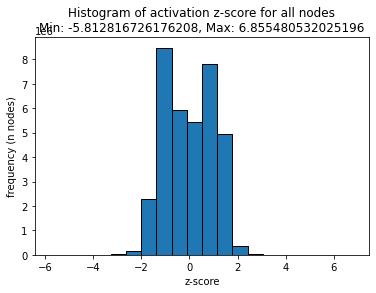

In [34]:
# Combine all node values into a single array
all_node_values = stacked_data.reshape(-1, n_nodes)

# Compute the minimum and maximum values for all node values
min_value = np.nanmin(all_node_values)
max_value = np.nanmax(all_node_values)

# Plot histogram for all node values
plt.figure()
plt.hist(all_node_values[~np.isnan(all_node_values)], bins=20, edgecolor='black')
plt.title(f"Histogram of activation z-score for all nodes\nMin: {min_value}, Max: {max_value}")
plt.xlabel("z-score")
plt.ylabel("frequency (n nodes)")
plt.show()

In [35]:
# Check subject_files sorting. Make sure it's the same order as the questionnaire similarity matrices.
for s in subject_files:
    print(s)

subject-0001_concat.csv
subject-0003_concat.csv
subject-0004_concat.csv
subject-0005_concat.csv
subject-0006_concat.csv
subject-0007_concat.csv
subject-0008_concat.csv
subject-0009_concat.csv
subject-0010_concat.csv
subject-0011_concat.csv
subject-0012_concat.csv
subject-0013_concat.csv
subject-0014_concat.csv
subject-0015_concat.csv
subject-0016_concat.csv
subject-0017_concat.csv
subject-0018_concat.csv
subject-0019_concat.csv
subject-0020_concat.csv
subject-0021_concat.csv
subject-0022_concat.csv
subject-0023_concat.csv
subject-0024_concat.csv
subject-0025_concat.csv
subject-0026_concat.csv
subject-0027_concat.csv
subject-0028_concat.csv
subject-0029_concat.csv
subject-0030_concat.csv
subject-0031_concat.csv
subject-0032_concat.csv
subject-0033_concat.csv
subject-0034_concat.csv
subject-0035_concat.csv
subject-0036_concat.csv
subject-0037_concat.csv
subject-0038_concat.csv
subject-0039_concat.csv
subject-0040_concat.csv
subject-0041_concat.csv
subject-0042_concat.csv
subject-0043_con

## Calculate similarity matrices 

Optimize the computation by calculating only the lower triangle of the correlation matrix for each node, as correlations are symmetric (correlation between subject i and subject j is the same as between subject j and subject i).The inner loop iterates over j values starting from i to n_subs. This ensures that you calculate only the unique correlations in the lower triangle of the matrix, and then you assign the symmetric correlation value to both the (i, j) and (j, i) positions in the similarity matrix. 

Although numpy.ma takes much longer than pairwise_distances (scikit-learn), it does ignore NaN values properly, without requiring imputation or zero-conversion. The np.ma.corrcoef() function from the numpy.ma module handles masked arrays that can automatically ignore masked (missing) values. Here, the np.ma.masked_invalid() function is used to create masked arrays for each subject's time series data, which automatically handles the NaN values by treating them as masked values. The np.ma.corrcoef() function then calculates the correlation while ignoring these masked values. This way, subjects with missing data will still contribute to the Pearson correlation calculations. 

This process takes about 2.5 hours for 300 nodes, 238 subjects, and 555 timepoints.

In [4]:
import numpy as np

n_subs, n_ts, n_nodes = stacked_data.shape

for node in range(n_nodes):
    print(f"Calculating similarity matrix for node {node + 1}/{n_nodes}")
    node_data = stacked_data[:, :, node]
    
    similarity_matrix = np.empty((n_subs, n_subs))  # Define similarity_matrix
    
    for i in range(n_subs):
        for j in range(i, n_subs):  # Only calculate unique correlations in the lower triangle
            
            masked_data_i = np.ma.masked_invalid(node_data[i])
            masked_data_j = np.ma.masked_invalid(node_data[j])
                        
            correlation = np.ma.corrcoef(masked_data_i, masked_data_j)[0, 1]
            similarity = 1 - correlation
            
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Assign symmetric correlation
                        
    # Save the similarity matrix to a CSV file
    csv_filename = f"analysis/similarity_matrices_mfMRI/similarity_node_{node + 1}.csv"
    np.savetxt(csv_filename, similarity_matrix, delimiter=',')
    
    print(f"Exported similarity matrix for node {node + 1}/{n_nodes} to {csv_filename}")

NameError: name 'stacked_data' is not defined

### Check dimensions and shape of output array

Only necessary if previous output was a 3d array.

In [13]:
print("Shape of similarity matrices:", similarity_matrices.shape) # n_subs, n_subs, n_nodes = similarity_matrices.shape
print("First similarity matrix (node 0):\n", similarity_matrices[:, :, 0])

Shape of similarity matrices: (238, 238, 300)
First similarity matrix (node 0):
 [[0.         1.76516572 0.25277409 ...        nan 1.75255438        nan]
 [1.76516572 0.         1.97238371 ...        nan 0.51402933        nan]
 [0.25277409 1.97238371 0.         ...        nan 1.43473662        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [1.75255438 0.51402933 1.43473662 ...        nan 0.                nan]
 [       nan        nan        nan ...        nan        nan        nan]]


### Export preserved array structure

In [14]:
import numpy as np
# Save similarity_matrices to a .npy file
np.save("analysis/similarity_matrices.npy", similarity_matrices)

In [4]:
# Load similarity_matrices from the .npy file
similarity_matrices = np.load("analysis/similarity_matrices.npy")

### Export along the nodes axis, where each CSV file corresponds to a specific node

In [16]:
import numpy as np
import os
import shutil

# Assuming similarity_matrices is the 3D array with shape (238, 238, 300)
n_subs, _, n_nodes = similarity_matrices.shape

# Create a directory to store the CSV files
output_dir = "analysis/similarity_matrices_mfMRI"

# Delete the output directory if it exists
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Create the output directory
os.makedirs(output_dir)

# Loop through the nodes and export each slice as a CSV file
for node_idx in range(n_nodes):
    node_slice = similarity_matrices[:, :, node_idx]
    csv_file_path = os.path.join(output_dir, f"node_{node_idx + 1}.csv")
    np.savetxt(csv_file_path, node_slice, delimiter=',', fmt='%f')

print("CSV files exported successfully.")

CSV files exported successfully.


#### Plot

Check the number of subjects (0:237=238), range of similarity values (normal range for this data is 0 to 2), etc.

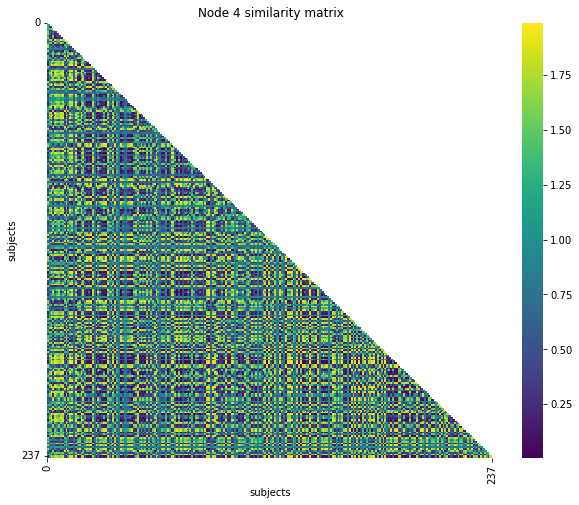

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

node = 4

# Define the path to your CSV file
csv_path = f'analysis/similarity_matrices_mfMRI/similarity_matrix_node_{node}.csv'

# Load the CSV file into a DataFrame without row names and header
data = pd.read_csv(csv_path, header=None)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data, dtype=bool))

# Plot the heatmap using the Viridis color map
sns.heatmap(data, cmap='viridis', cbar=True, mask=mask)

# Set x-axis and y-axis tick labels to only minimum and maximum values
x_ticks = [0, data.shape[1] - 1]
y_ticks = [0, data.shape[0] - 1]
plt.xticks(x_ticks, labels=data.columns[x_ticks], rotation='vertical')
plt.yticks(y_ticks, labels=data.index[y_ticks])

plt.title(f'Node {node} similarity matrix')
plt.xlabel('subjects')
plt.ylabel('subjects')

plt.show()


### Next step: Intersubject Representational Similarity Analysis (IS-RSA)